## Explore

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


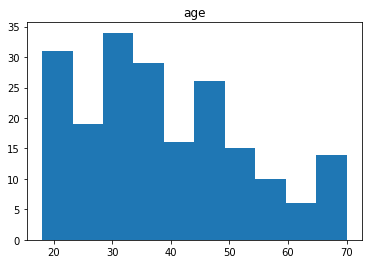

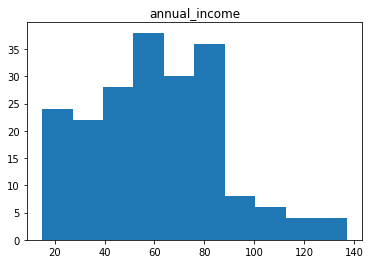

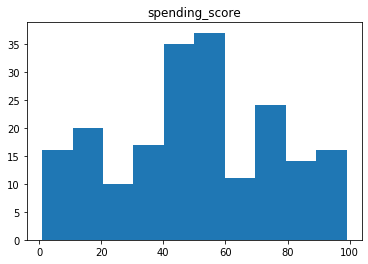

train (144, 6)
test (30, 6)
validate (26, 6)


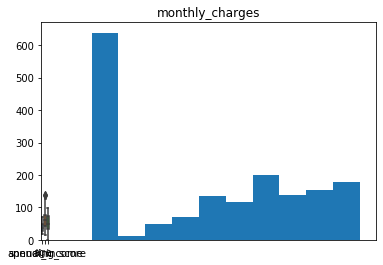

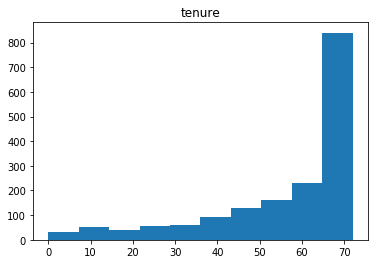

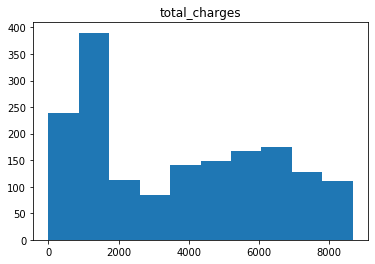

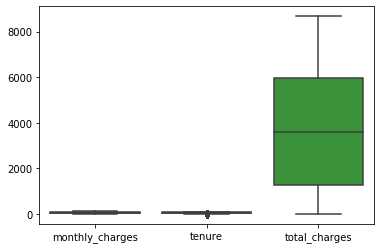

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_grades

In [2]:
# plt.rc sets defaults for matplotlib figures
plt.rc('font', size=13)
plt.rc('figure', figsize=(13,7))

In [3]:
df = wrangle_grades()
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

In [6]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


## Continuous and Continuous Variables

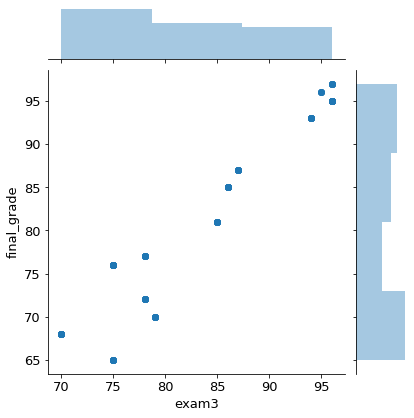

In [7]:
sns.jointplot(x='exam3', y='final_grade', data=train)

Thoughts: Is there a stronger correlation between exams 1 and 3 and final grade compared to exam 2?

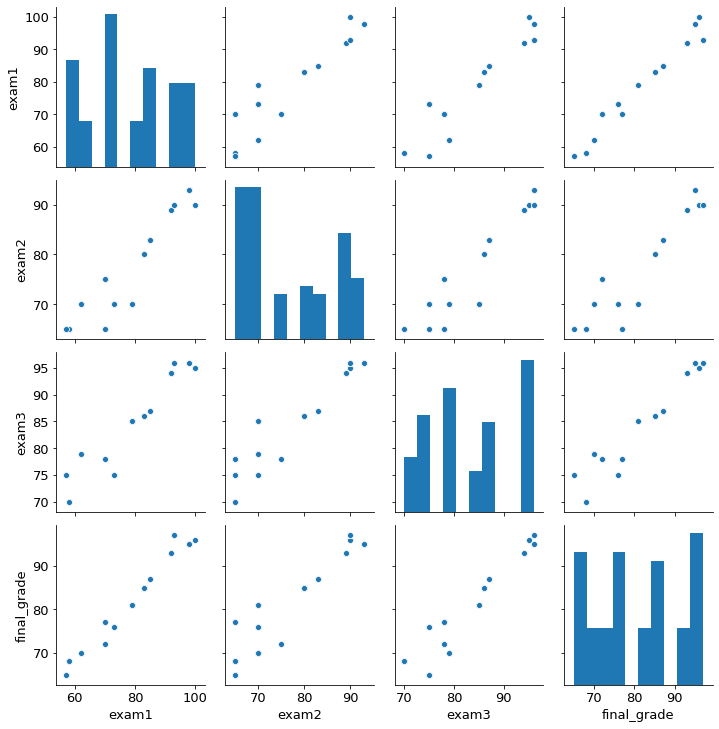

In [8]:
sns.pairplot(train)

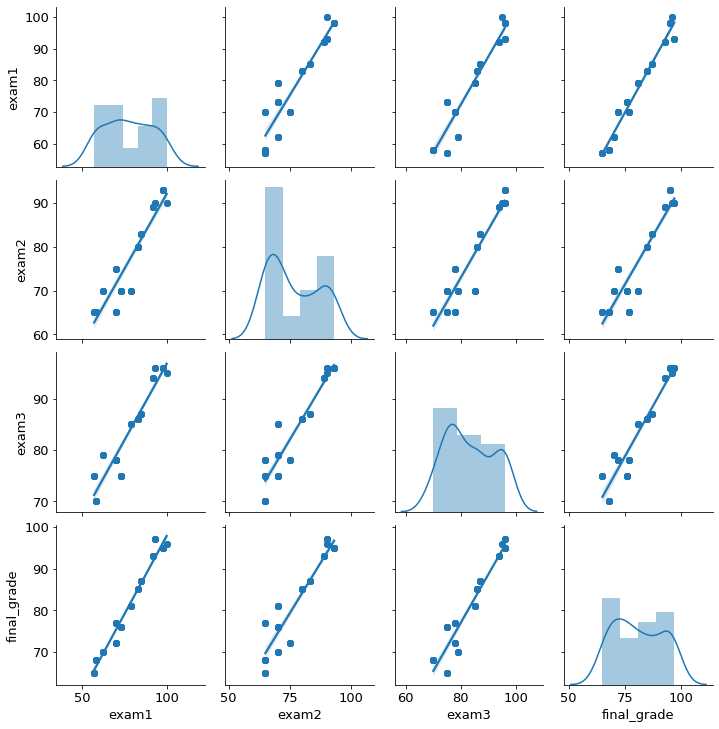

In [9]:
# Same as the above, but we can customize with this method
g = sns.PairGrid(train)
g.map_diag(sns.distplot)
g.map_offdiag(sns.regplot)

In [10]:
train.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.934099,0.947911,0.985155
exam2,0.934099,1.000000,0.938353,0.926828
exam3,0.947911,0.938353,1.000000,0.954037
final_grade,0.985155,0.926828,0.954037,1.000000


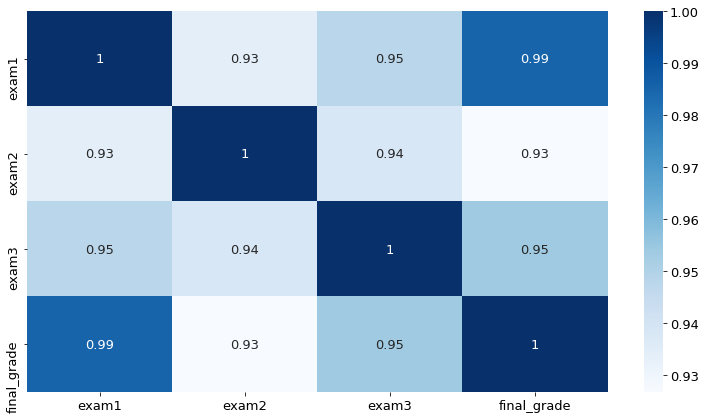

In [11]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Takeaways:
- Exam 2 has the least correlation with final grade
- Exam 1 has the highest correlation with final grade

## Continuous and Categorical Variables

In [12]:
train['exam1_letter_grade'] = pd.cut(train.exam1, bins=[0,70,80,90,105], labels=['D','C','B','A'])
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,exam1,exam2,exam3,final_grade,exam1_letter_grade
1,98,93,96,95,A
20,73,70,75,76,C
78,100,90,95,96,A
29,83,80,86,85,B
75,58,65,70,68,D


Viz types for continuous x categorical:
- boxplot
- bar chart
- violin
- swarmplot

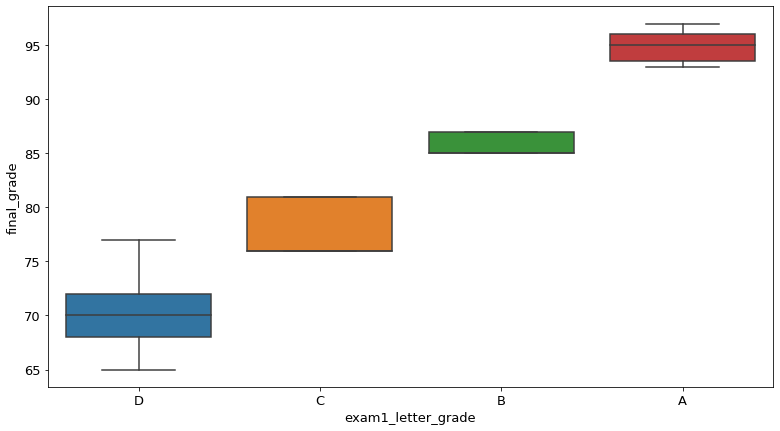

In [13]:
sns.boxplot(data=train, y='final_grade', x='exam1_letter_grade')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

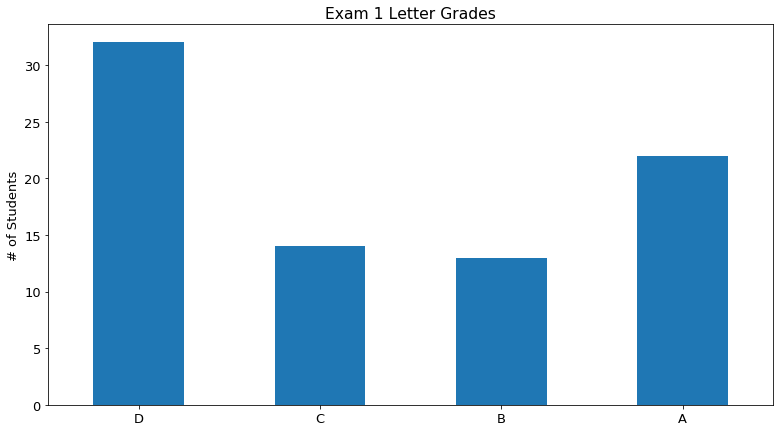

In [14]:
train.exam1_letter_grade.value_counts().sort_index().plot.bar(title='Exam 1 Letter Grades')
plt.ylabel('# of Students')
plt.xticks(rotation=0)

In [15]:
np.random.seed(13)
train['classroom'] = np.random.choice(['One','Two'], train.shape[0])
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,One
20,73,70,75,76,C,One
78,100,90,95,96,A,One
29,83,80,86,85,B,One
75,58,65,70,68,D,One


(0, 100)

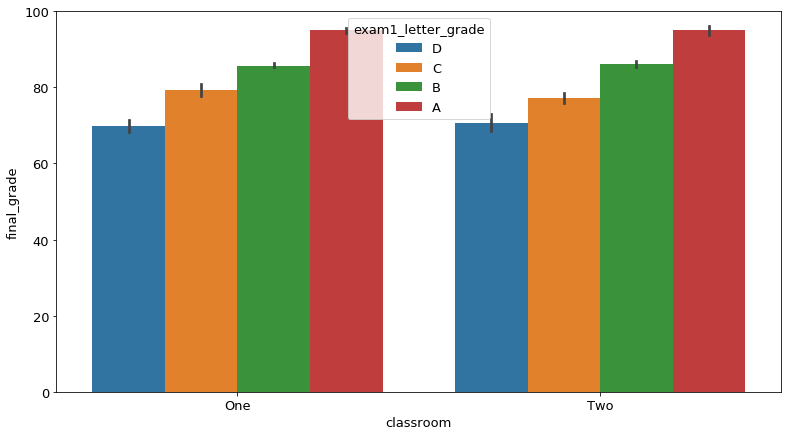

In [16]:
sns.barplot(data=train, y='final_grade', x='classroom', hue='exam1_letter_grade')
plt.ylim(0,100)

Takeaway: 
- The distribution of grades in classroom one and classroom two are about the same
- Classroom doesn't impact final grade? Let's run a hypothesis to check


- $H_0$: There is no difference in final grade between classroom one and classroom two
- $H_a$: There is a difference in final grade between classroom one and classroom two

In [17]:
from scipy import stats

stats.ttest_ind(
    train[train.classroom == 'One'].final_grade, 
    train[train.classroom == 'Two'].final_grade,
    equal_var=False
)

Ttest_indResult(statistic=0.866735071416622, pvalue=0.3887772518573801)

With a p-value of 0.025, we reject the null hypothesis that there is no difference in final grade between classroom one and classroom two

p-value: P(observe our data due ot change | H0)

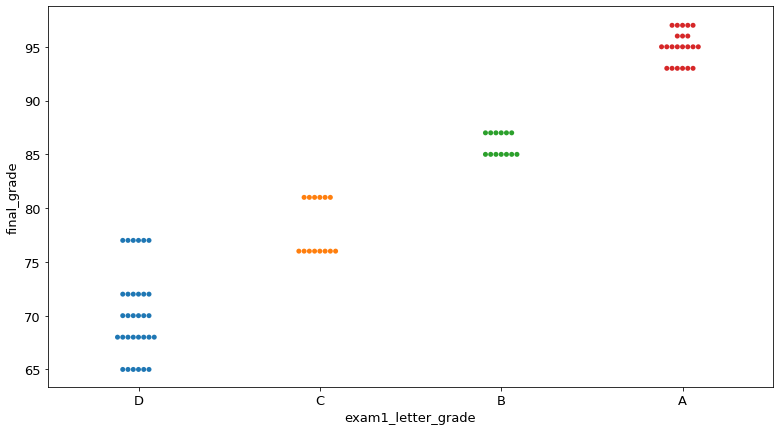

In [18]:
# x is the category 
# y is the continuous
sns.swarmplot(data=train, y='final_grade', x='exam1_letter_grade')

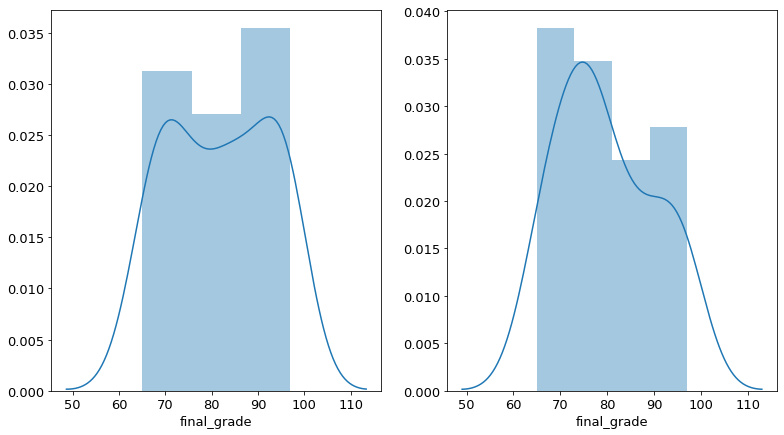

In [19]:
plt.subplot(121)
sns.distplot(train[train.classroom == 'One'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom == 'Two'].final_grade)

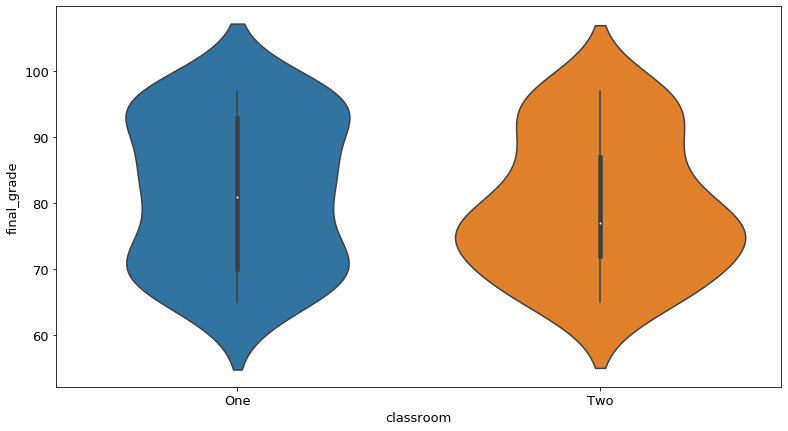

In [20]:
sns.violinplot(data=train, y='final_grade', x='classroom')

## Categorical and Categorical Variables

In [21]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,One
20,73,70,75,76,C,One
78,100,90,95,96,A,One
29,83,80,86,85,B,One
75,58,65,70,68,D,One


In [22]:
# Feeding into the crosstab our two categorical variables 
# normalize lets us go from counts to proportions 
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)
ctab.applymap('{:.1%}'.format)




classroom,One,Two
exam1_letter_grade,,
D,21.0%,18.5%
C,7.4%,9.9%
B,9.9%,6.2%
A,17.3%,9.9%


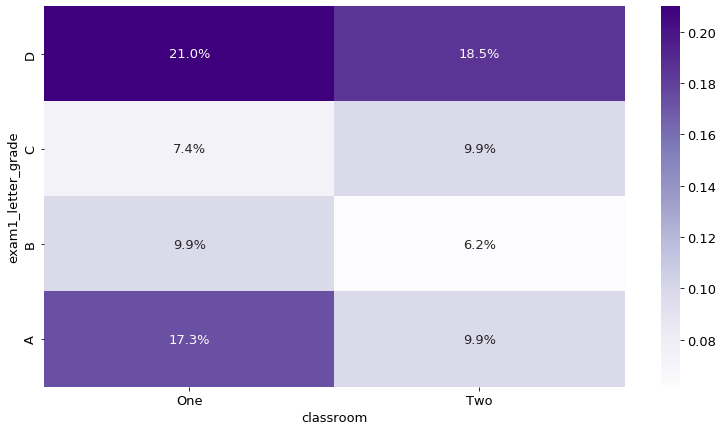

In [23]:
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)
sns.heatmap(ctab, cmap='Purples', annot=True, fmt='.1%')

In [24]:
pd.crosstab(train.classroom, train.exam1_letter_grade, normalize='index')


exam1_letter_grade,D,C,B,A
classroom,,,,
One,0.377778,0.133333,0.177778,0.311111
Two,0.416667,0.222222,0.138889,0.222222
